## 6.5 Machine Learning Part 2

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/dana/Documents/Pew Research Reading Project'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_all3years.pkl'))

In [5]:
df.shape

(5006, 23)

In [6]:
df.head()

,id,year,language,state,sex,age,marital,education,employment,hispanic,...,number_of_books_read,read_printed_books,read_audiobooks,read_e-books,income_estimate,reader_category,generation,reading_type,education_group,employed
0,1,2018,English,PA,Female,33,Living with a partner,High school graduate,Employed full-time,No,...,1,Yes,No,No,68456,Average reader,Millenials,Printed only,High school graduate,Employed
1,2,2018,English,SC,Female,76,Married,Do not know,Retired,No,...,5,Yes,No,No,32638,Average reader,Silent Gen,Printed only,Unknown,Not employed
2,3,2018,English,NJ,Female,24,Widowed,Associate degree,(VOL) Have own business/self-employed,No,...,0,No,No,No,30281,Non-reader,Millenials,Non-reader,College < 4yr degree,Employed
3,4,2018,English,MD,Female,60,Living with a partner,Associate degree,(VOL) Other,No,...,2,Yes,No,No,15844,Average reader,Boomers,Printed only,College < 4yr degree,Unknown
4,5,2018,English,NH,Male,55,Married,"Some college, no degree",Employed full-time,No,...,6,Yes,No,Yes,86812,Average reader,Gen X,Printed and e-books,College < 4yr degree,Employed


In [7]:
df.columns

Index(['id', 'year', 'language', 'state', 'sex', 'age', 'marital', 'education',
       'employment', 'hispanic', 'race', 'income', 'party',
       'number_of_books_read', 'read_printed_books', 'read_audiobooks',
       'read_e-books', 'income_estimate', 'reader_category', 'generation',
       'reading_type', 'education_group', 'employed'],
      dtype='object')

In [8]:
df['education_group'].value_counts()

College < 4yr degree     1303
College 4yr degree       1264
High school graduate     1111
College > 4yr degree      915
Less than high school     348
Unknown                    65
Name: education_group, dtype: int64

In [9]:
# assign numbers to education groups
df = df.replace({'education_group': {'Unknown': 0, 'Less than high school': 1, 'High school graduate': 2,
                               'College < 4yr degree': 3, 'College 4yr degree': 4, 'College > 4yr degree': 5}})

In [10]:
df['education_group'].value_counts()

3    1303
4    1264
2    1111
5     915
1     348
0      65
Name: education_group, dtype: int64

In [11]:
df['reading_type'].value_counts()

Printed only           1869
Non-reader             1079
Printed and e-books     715
All forms               444
Printed and audio       418
E-books only            185
Audio only              111
Unknown                 102
Audio and e-books        83
Name: reading_type, dtype: int64

In [12]:
# assign numbers to reading_type
df = df.replace({'reading_type': {'Unknown': 0, 'Audio and e-books': 1, 'Audio only': 2,
                               'E-books only': 3, 'Printed and audio': 4, 'All forms': 5,
                                 'Printed and e-books': 6, 'Non-reader': 7, 'Printed only': 8}})

In [13]:
df['reading_type'].value_counts()

8    1869
7    1079
6     715
5     444
4     418
3     185
2     111
0     102
1      83
Name: reading_type, dtype: int64

In [14]:
# keep only the columns I need
df = df[['age','number_of_books_read','education_group','reading_type']]

In [15]:
df.head()

,age,number_of_books_read,education_group,reading_type
0,33,1,2,8
1,76,5,0,8
2,24,0,3,7
3,60,2,3,8
4,55,6,3,6


In [16]:
# normalize the data

# copy the data
df = df.copy()
  
# apply normalization techniques
for column in df.columns:
    df[column] = df[column]  / df[column].abs().max()
      
# view normalized data
display(df)

,age,number_of_books_read,education_group,reading_type
0,0.340206,0.010309,0.4,1.000
1,0.783505,0.051546,0.0,1.000
2,0.247423,0.000000,0.6,0.875
3,0.618557,0.020619,0.6,1.000
4,0.567010,0.061856,0.6,0.750
...,...,...,...,...
1497,0.422680,0.051546,0.6,0.500
1498,0.474227,0.030928,0.6,0.750
1499,0.185567,0.020619,0.4,0.500
1500,0.237113,0.010309,0.4,1.000


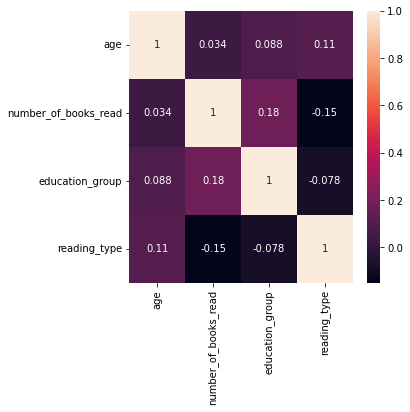

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [18]:
# none are strong, but highest is education group with number of books read which is 0.18
# followed by reading type with age 0.11

### 2. The elbow technique

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-1056.0867012358185,
 -793.0238619006635,
 -631.456274943957,
 -478.6323347656303,
 -414.6739476086762,
 -369.4739510464546,
 -337.58228220611693,
 -317.6062602594204,
 -297.15538031719154]

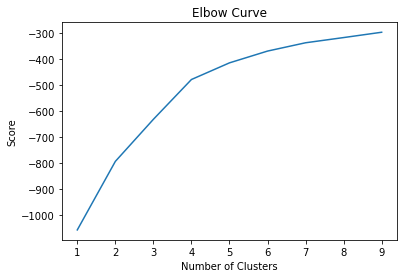

In [21]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [22]:
# it's not a very sharp elbow

In [23]:
# try silhouette score method

import sklearn.cluster as cluster
import sklearn.metrics as metrics
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.2948400076206511
Silhouette score for k(clusters) = 3 is 0.2995214148947897
Silhouette score for k(clusters) = 4 is 0.30318379421107583
Silhouette score for k(clusters) = 5 is 0.28299622984680384
Silhouette score for k(clusters) = 6 is 0.27984887615642645
Silhouette score for k(clusters) = 7 is 0.2704262811311829
Silhouette score for k(clusters) = 8 is 0.26389145280027493
Silhouette score for k(clusters) = 9 is 0.26501545698995455


In [24]:
# 4 is the best one

### 3. k-means clustering

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 


In [26]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=4)

In [27]:
df['clusters'] = kmeans.fit_predict(df)

In [28]:
df.head()

,age,number_of_books_read,education_group,reading_type,clusters
0,0.340206,0.010309,0.4,1.000,0
1,0.783505,0.051546,0.0,1.000,0
2,0.247423,0.000000,0.6,0.875,0
3,0.618557,0.020619,0.6,1.000,0
4,0.567010,0.061856,0.6,0.750,0


In [29]:
df['clusters'].value_counts()

0    2156
3    1515
2     944
1     391
Name: clusters, dtype: int64

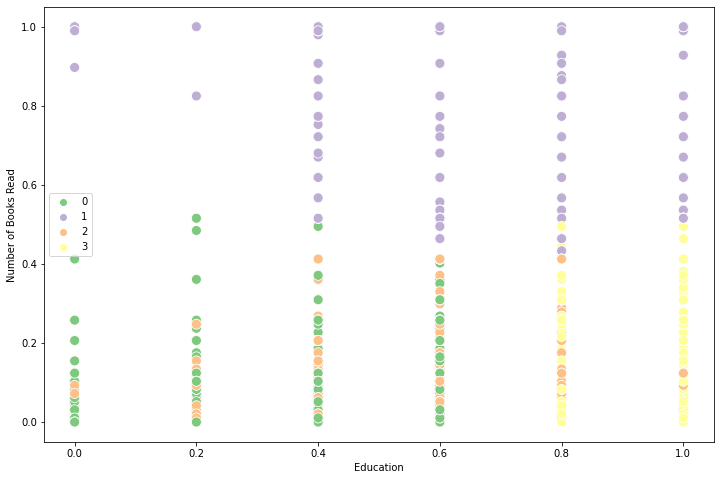

In [30]:
# Plot the clusters for education and number of books

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['education_group'], y=df['number_of_books_read'], hue=kmeans.labels_, s=100, 
                     palette='Accent') 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Education') # Label x-axis.
plt.ylabel('Number of Books Read') # Label y-axis.
plt.show()

In [31]:
df.loc[df['clusters'] == 0, 'cluster'] = 'green'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'orange'
df.loc[df['clusters'] == 3, 'cluster'] = 'yellow'

In [32]:
df.groupby('cluster').agg({'reading_type':['mean', 'median'], 
                         'education_group':['mean', 'median'], 
                           'age':['mean','median'],
                         'number_of_books_read':['mean', 'median']})

reading_type        education_group              age            \
                mean median            mean median      mean    median   
cluster                                                                  
green       0.912454  0.875        0.448609    0.4  0.525764  0.546392   
orange      0.393671  0.500        0.668432    0.6  0.466255  0.453608   
purple      0.692136  0.750        0.708951    0.8  0.549898  0.587629   
yellow      0.880446  1.000        0.888845    0.8  0.552700  0.567010   

        number_of_books_read            
                        mean    median  
cluster                                 
green               0.049815  0.020619  
orange              0.108204  0.072165  
purple              0.820155  0.989691  
yellow              0.110075  0.061856

In [33]:
sns.catplot(
    data=df, x='eduation_group', y='number_of_books_read',hue='clusters',
     col='reading_type',palette='Accent'
)

ValueError: Could not interpret input 'eduation_group'